In [1]:
# First Data Project
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


First some basic questions:
1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

In [6]:
import matplotlib.pyplot as plt
# Inline display of plots
%matplotlib inline

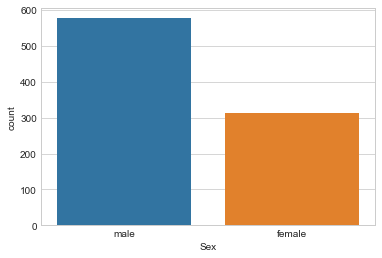

In [7]:
sns.countplot('Sex',data=titanic_df)

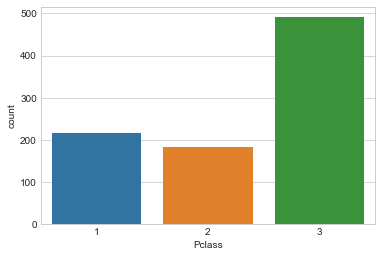

In [8]:
sns.countplot("Pclass",data=titanic_df)

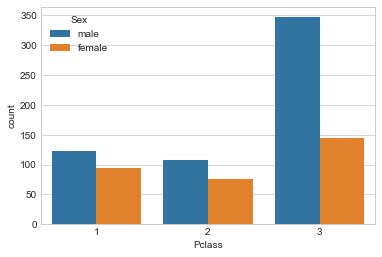

In [9]:
sns.countplot('Pclass',data=titanic_df, hue='Sex')

In [10]:
# Any passenger is less tha  16 yrs age, we will call them as child
def male_female_child(passenger):
    # Take the Age and Sex
    age, sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [11]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

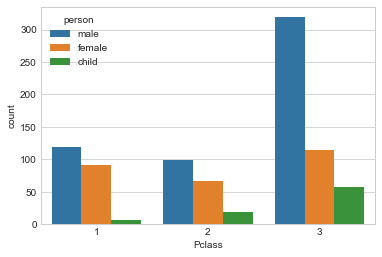

In [14]:
sns.countplot('Pclass',data=titanic_df,hue='person')

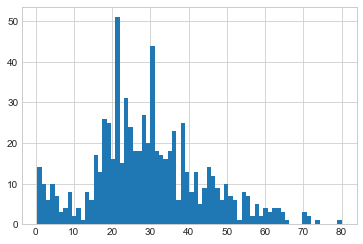

In [15]:
titanic_df['Age'].hist(bins=70)

In [17]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

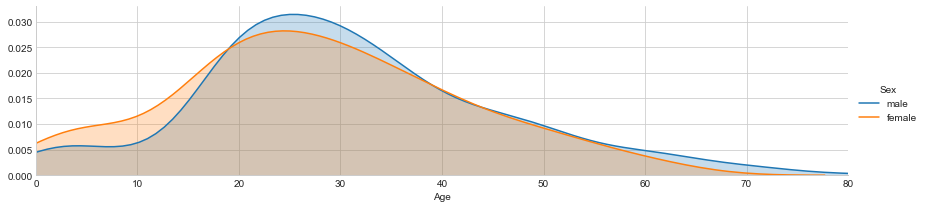

In [23]:
# Kde plot
fig = sns.FacetGrid(titanic_df,hue='Sex', aspect=4)

#Use map to plot all the possible kde plots
fig.map(sns.kdeplot,'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

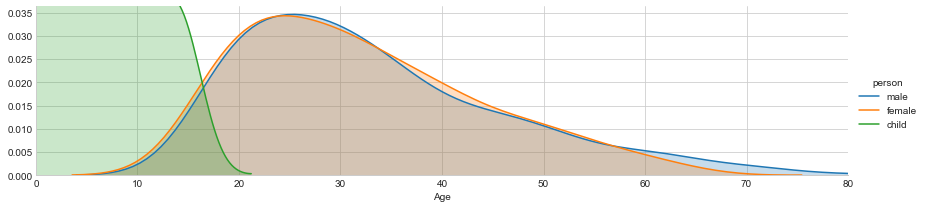

In [24]:
# Kde plot
fig = sns.FacetGrid(titanic_df,hue='person', aspect=4)

#Use map to plot all the possible kde plots
fig.map(sns.kdeplot,'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

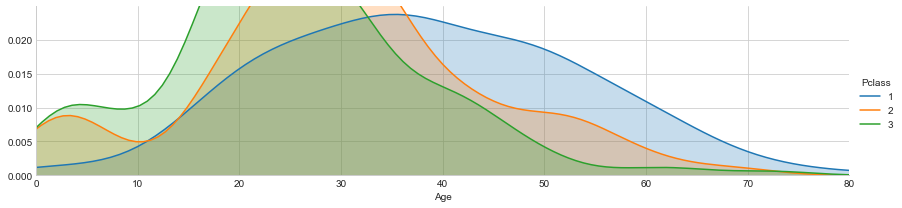

In [25]:
# Kde plot
fig = sns.FacetGrid(titanic_df,hue='Pclass', aspect=4)

#Use map to plot all the possible kde plots
fig.map(sns.kdeplot,'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

In [26]:
#We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. So let's move on to our 2nd question: What deck were the passengers on and how does that relate to their class?

In [27]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [28]:
deck = titanic_df['Cabin'].dropna()

In [29]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [31]:
# Lets grab the letter of the deck with a for loop
levels = []
# for
for level in deck:
    levels.append(level[0])
    
levels

['C',
 'C',
 'E',
 'G',
 'C',
 'D',
 'A',
 'C',
 'B',
 'D',
 'B',
 'C',
 'B',
 'C',
 'F',
 'F',
 'C',
 'E',
 'A',
 'D',
 'D',
 'C',
 'B',
 'E',
 'D',
 'F',
 'D',
 'C',
 'B',
 'F',
 'C',
 'E',
 'B',
 'A',
 'C',
 'F',
 'A',
 'F',
 'B',
 'B',
 'G',
 'A',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'G',
 'C',
 'B',
 'E',
 'B',
 'C',
 'C',
 'C',
 'D',
 'A',
 'B',
 'D',
 'C',
 'C',
 'B',
 'E',
 'C',
 'C',
 'E',
 'C',
 'B',
 'C',
 'E',
 'C',
 'D',
 'B',
 'C',
 'C',
 'C',
 'E',
 'T',
 'F',
 'C',
 'F',
 'C',
 'E',
 'D',
 'B',
 'E',
 'C',
 'B',
 'D',
 'G',
 'C',
 'E',
 'C',
 'E',
 'B',
 'C',
 'A',
 'C',
 'C',
 'C',
 'E',
 'D',
 'E',
 'E',
 'D',
 'A',
 'B',
 'C',
 'B',
 'C',
 'D',
 'C',
 'B',
 'C',
 'E',
 'D',
 'F',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'C',
 'C',
 'A',
 'E',
 'C',
 'E',
 'E',
 'C',
 'A',
 'E',
 'B',
 'D',
 'A',
 'C',
 'F',
 'D',
 'D',
 'D',
 'A',
 'B',
 'B',
 'D',
 'A',
 'D',
 'E',
 'C',
 'B',
 'B',
 'D',
 'B',
 'B',
 'C',
 'F',
 'C',
 'E',
 'E',
 'C',
 'C',
 'C',
 'F',
 'C',
 'E',
 'E'

In [37]:
#Countplot to view data
cabin_df = DataFrame(levels)

cabin_df

cabin_df.columns = ['Cabin']

cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B
9,D


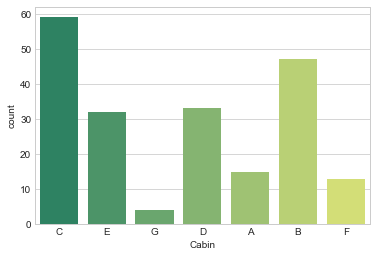

In [38]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

#Replot
sns.countplot('Cabin',data=cabin_df,palette='summer')


In [39]:
#Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:
# 3.) Where did the passengers come from

In [40]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


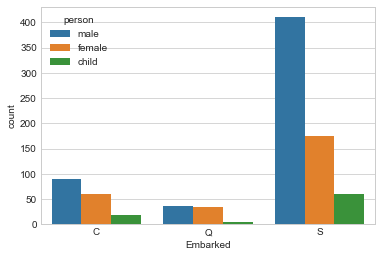

In [42]:
sns.countplot('Embarked',data=titanic_df, hue='person', order=['C','Q','S'])

In [43]:
# Now let's take a look at the 4th question:
# 4.) Who was alone and who was with family?

In [44]:
titanic_df['Alone']=titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [45]:
# Look for values >0, and values ==0, if values ==0 then put the string as alone else put the string as with Family

titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'

C:\unzipped\Anaconda2\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [47]:
# What factors influenced the survival of passengers
titanic_df["Survivor"] = titanic_df.Survived.map({0:"no",1:"yes"})

In [48]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


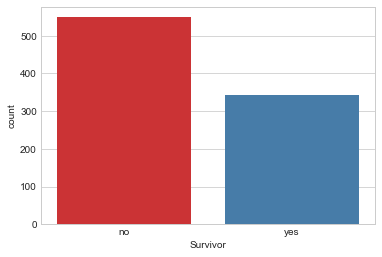

In [49]:
# Plot the data to have a quick overview
sns.countplot('Survivor',data=titanic_df, palette='Set1')

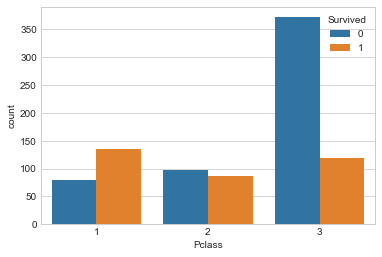

In [50]:
sns.countplot('Pclass',data=titanic_df,hue='Survived')

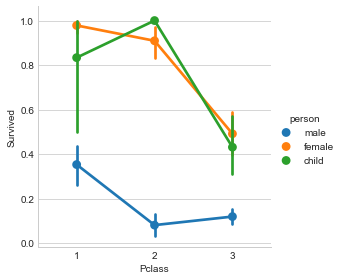

In [51]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

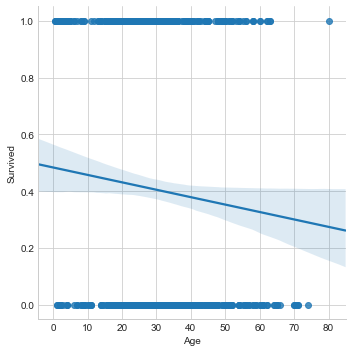

In [52]:
sns.lmplot('Age','Survived',data=titanic_df)

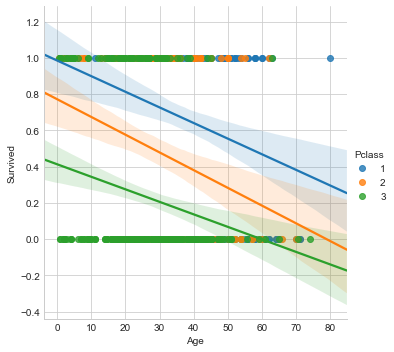

In [53]:
sns.lmplot('Age','Survived',data=titanic_df, hue='Pclass')